鸢尾花数据集或费舍尔的鸢尾花数据集是由英国统计学家、优生学家和生物学家罗纳德·费舍尔在他1936年的论文《在分类问题中使用多个测量值》中引入的一个多变量数据集，作为线性判别分析的示例。有时也被称为安德森的鸢尾花数据集，因为埃德加·安德森收集了这些数据来量化三个相关物种的鸢尾花形态变异。其中三个物种中有两个是从加斯佩半岛采集的，“全部来自同一牧场，在同一天采摘，并由同一人用相同仪器同时测量”。费舍尔的论文发表在《优生学年报》杂志上，对于今天继续使用鸢尾花数据集教授统计技术引起了争议。

该数据集包含每种鸢尾花（山鸢尾、弗吉尼亚州鸢尾和变色秋海棠）各50个样本。从每个样本中测得四个特征：萼片和花瓣的长度和宽度，以厘米为单位。基于这四个特征的组合，费舍尔开发了一个线性判别模型来区分不同的物种。

![https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png](https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png)

source image:https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png

本研究尝试使用Kmeans对鸢尾花数据集进行聚类。

[属性信息：
](https://archive.ics.uci.edu/ml/datasets/iris)
1. 花萼长度（厘米）
2. 花萼宽度（厘米）
3. 花瓣长度（厘米）
4. 花瓣宽度（厘米）
5. 类别：
-- 山鸢尾
-- 变色鸢尾
-- 维吉尼亚鸢尾

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [100]:
iris = pd.read_csv("./data/iris/IRIS.csv")
x = iris.iloc[:, [0, 1, 2, 3]].values

In [101]:
iris.info()
iris[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [102]:
# 种类的频率分布
iris_outcome = pd.crosstab(index=iris["species"],  
                              columns="count")      

iris_outcome

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [103]:
iris_setosa=iris.loc[iris["species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]

绘制成直方图。

/opt/homebrew/Caskroom/miniconda/base/envs/datasci/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/datasci/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/datasci/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


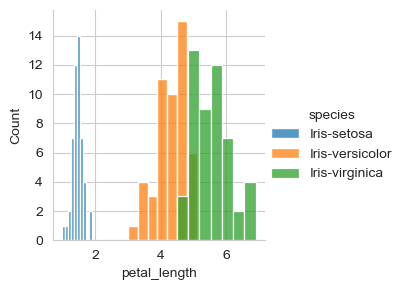

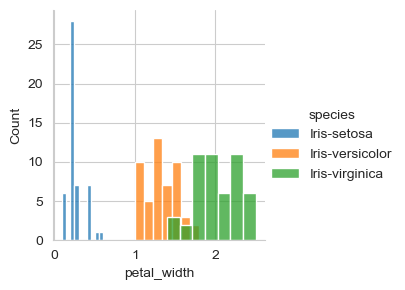

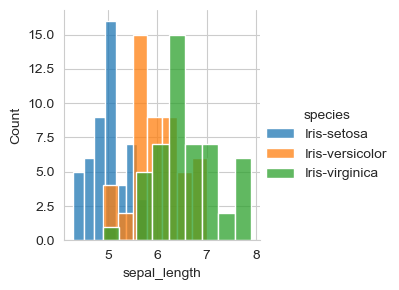

In [104]:
sns.FacetGrid(iris,hue="species",height=3).map(sns.histplot,"petal_length").add_legend()
sns.FacetGrid(iris,hue="species",height=3).map(sns.histplot,"petal_width").add_legend()
sns.FacetGrid(iris,hue="species",height=3).map(sns.histplot,"sepal_length").add_legend()
plt.show()

box plot

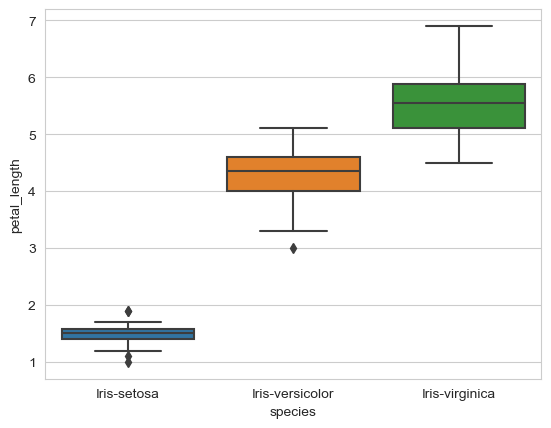

In [105]:
sns.boxplot(x="species",y="petal_length",data=iris)
plt.show()

violin plot

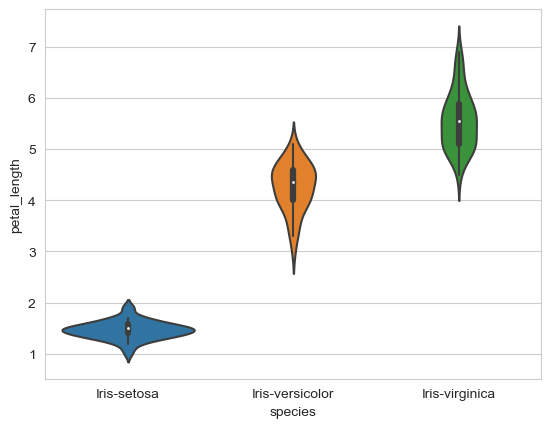

In [106]:
sns.violinplot(x="species",y="petal_length",data=iris)
plt.show()

**Scatter plot**


/opt/homebrew/Caskroom/miniconda/base/envs/datasci/lib/python3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/miniconda/base/envs/datasci/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


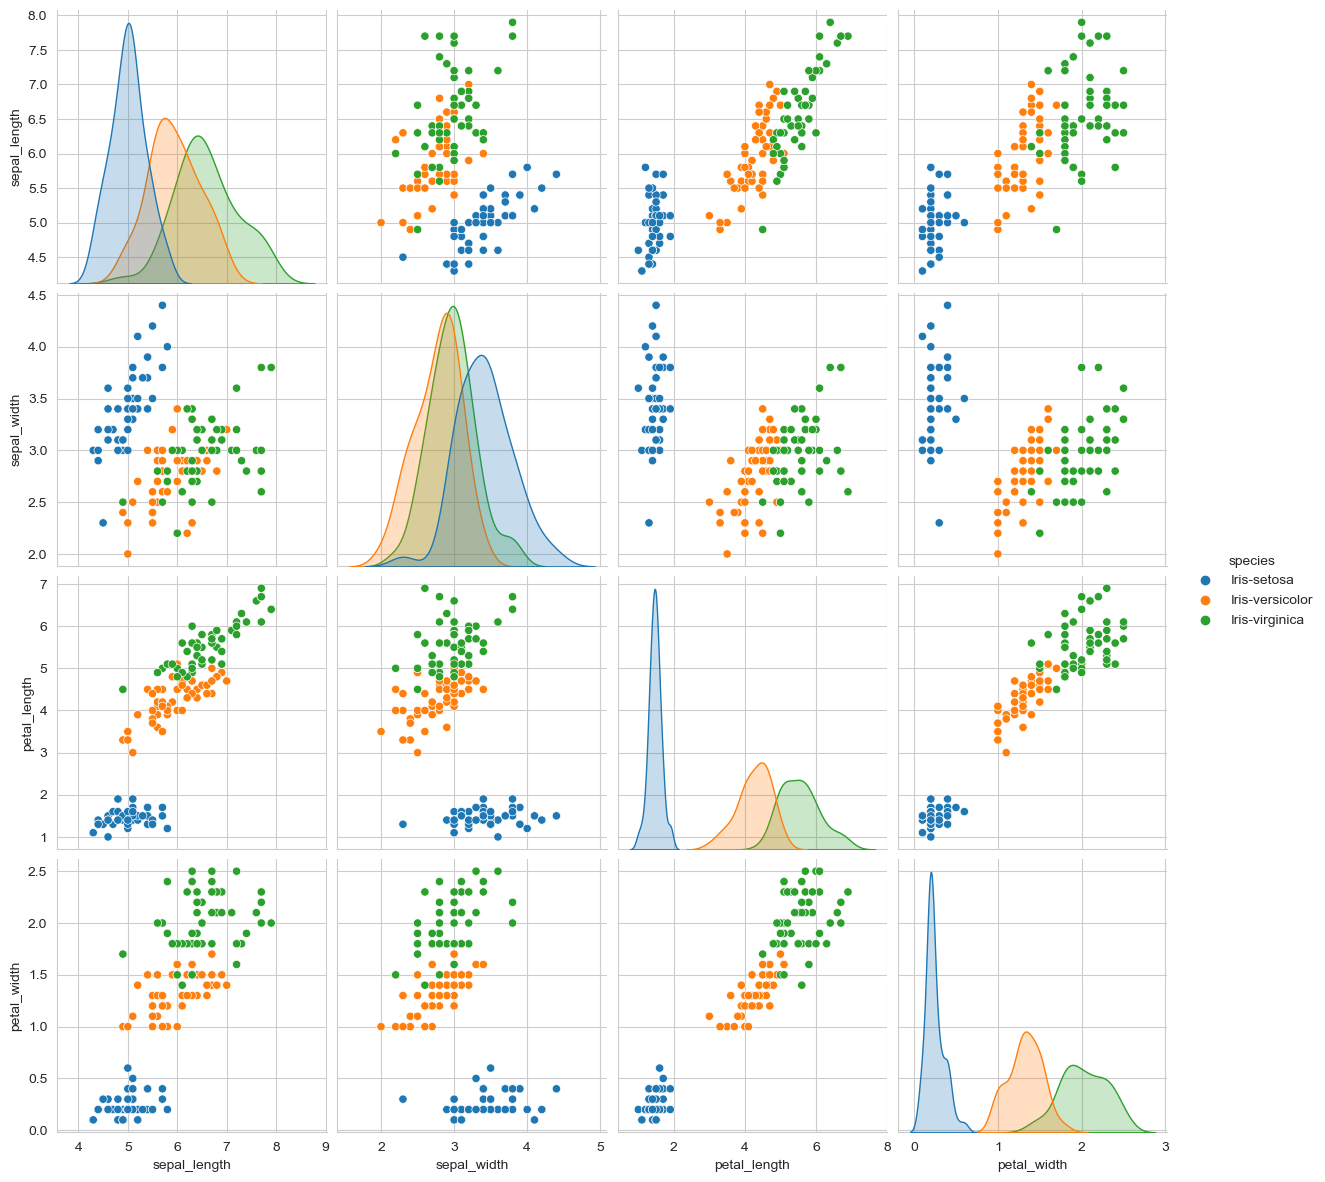

In [107]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",size=3);
plt.show()

# K-Means

[K-means](http://https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/) 是一种基于质心的算法，或者说是一种基于距离的算法，我们通过计算距离来将一个点分配到一个簇中。在K-Means中，每个簇都与一个质心相关联。

# 如何实现K-Means聚类？

* 选择簇的数量k
* 从数据中随机选择k个点作为质心
* 将所有点分配给最近的簇质心
* 重新计算新形成簇的质心
* 重复步骤3和4

In [108]:
# 寻找k-means分类的最佳聚类数
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# 使用肘部法确定k-means聚类的最佳簇数。

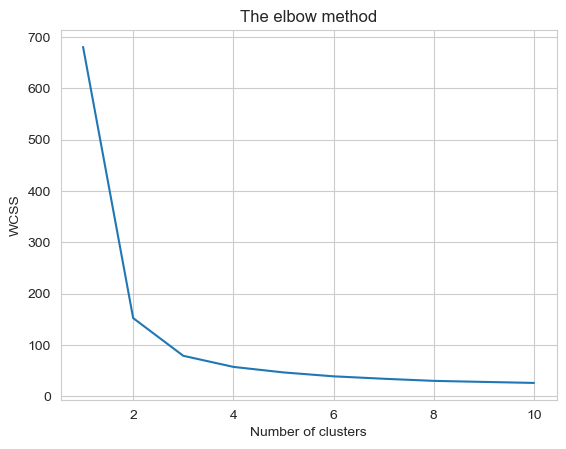

In [109]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # 簇内平方和
plt.show()

# 实施K-Means聚类算法

分别利用不同距离度量进行聚类

In [111]:
from sklearn.metrics import pairwise_distances_argmin, silhouette_score

def compute_centroids(X, labels, k, distance_metric='euclidean'):
    centroids = np.zeros((k, X.shape[1]))
    for ki in range(k):
        centroids[ki, :] = np.mean(X[labels == ki, :], axis=0)
    return centroids

def kmeans(X, k=3, max_iter=300, distance_metric='euclidean'):
    # 随机初始化质心
    random_idx = np.random.permutation(X.shape[0])[:k]
    centroids = X[random_idx, :]
    
    # 用于存储上一次迭代的标签
    prev_labels = None

    # 迭代优化
    for iteration in range(max_iter):
        # 分配样本到最近的质心
        labels = pairwise_distances_argmin(X, centroids, metric=distance_metric)

        # 计算与上次迭代的标签变化量
        if prev_labels is not None:
            n_changes = np.sum(labels != prev_labels)
            print(f"迭代 {iteration + 1} 的标签变化量: {n_changes}")

        prev_labels = labels

        # 重新计算质心
        new_centroids = compute_centroids(X, labels, k, distance_metric)
        
        # 如果质心没有变化，提前终止
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids
    
    return labels, centroids



# 使用欧氏距离进行 K-Means 聚类
labels_euclidean, centroids_euclidean = kmeans(x, distance_metric='euclidean')

# 使用曼哈顿距离进行 K-Means 聚类
labels_manhattan, centroids_manhattan = kmeans(x, distance_metric='manhattan')

# 计算轮廓系数
silhouette_euclidean = silhouette_score(x, labels_euclidean)
silhouette_manhattan = silhouette_score(x, labels_manhattan)

print("欧氏距离轮廓系数: ", silhouette_euclidean)
print("曼哈顿距离轮廓系数: ", silhouette_manhattan)

迭代 2 的标签变化量: 12
迭代 3 的标签变化量: 6
迭代 4 的标签变化量: 3
迭代 5 的标签变化量: 2
迭代 6 的标签变化量: 0
迭代 2 的标签变化量: 11
迭代 3 的标签变化量: 11
迭代 4 的标签变化量: 6
迭代 5 的标签变化量: 0
欧氏距离轮廓系数:  0.5169605202239881
曼哈顿距离轮廓系数:  0.5531156214473459


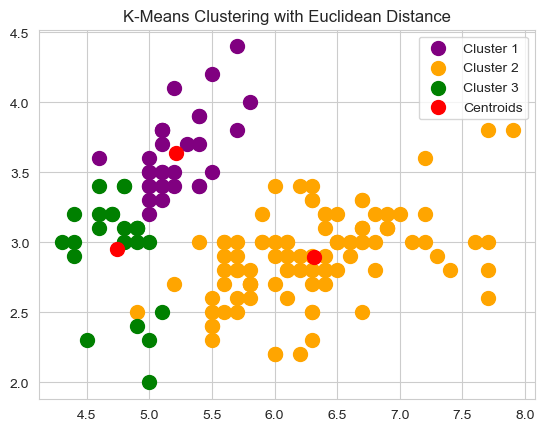

In [89]:
# 可视化聚类效果和质心 - 欧氏距离
plt.scatter(x[labels_euclidean == 0, 0], x[labels_euclidean == 0, 1], s=100, c='purple', label='Cluster 1')
plt.scatter(x[labels_euclidean == 1, 0], x[labels_euclidean == 1, 1], s=100, c='orange', label='Cluster 2')
plt.scatter(x[labels_euclidean == 2, 0], x[labels_euclidean == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(centroids_euclidean[:, 0], centroids_euclidean[:, 1], s=100, c='red', label='Centroids')
plt.title('K-Means Clustering with Euclidean Distance')
plt.legend()
plt.show()

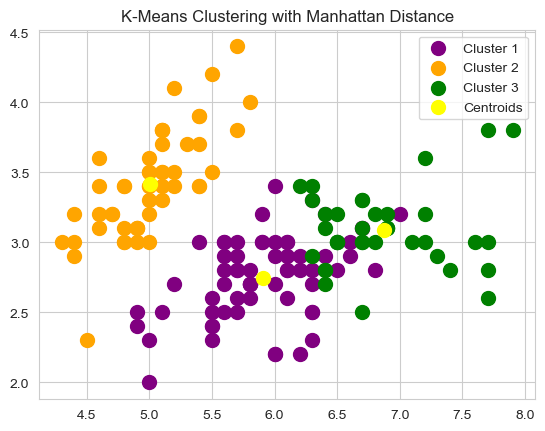

In [90]:
# 可视化聚类效果和质心 - 曼哈顿距离
plt.scatter(x[labels_manhattan == 0, 0], x[labels_manhattan == 0, 1], s=100, c='purple', label='Cluster 1')
plt.scatter(x[labels_manhattan == 1, 0], x[labels_manhattan == 1, 1], s=100, c='orange', label='Cluster 2')
plt.scatter(x[labels_manhattan == 2, 0], x[labels_manhattan == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(centroids_manhattan[:, 0], centroids_manhattan[:, 1], s=100, c='yellow', label='Centroids')
plt.title('K-Means Clustering with Manhattan Distance')
plt.legend()
plt.show()

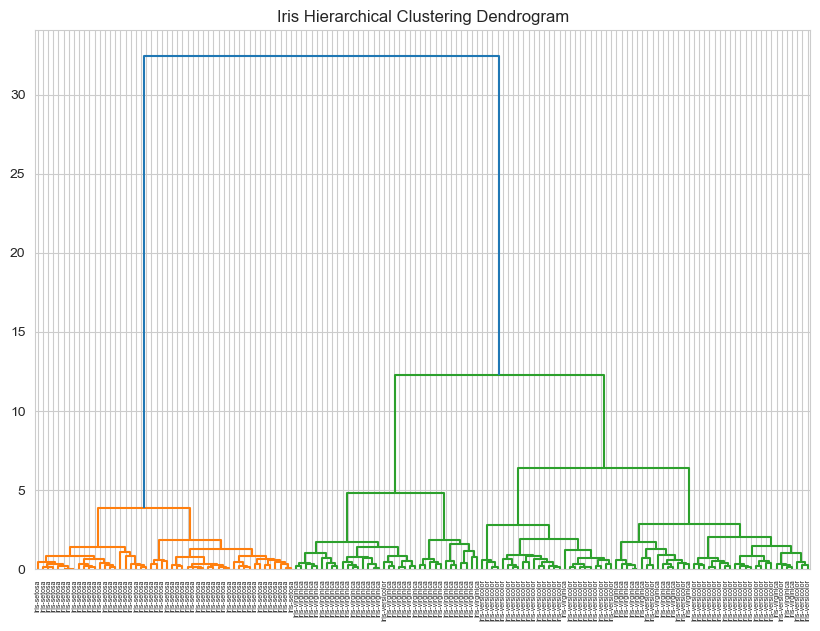

In [112]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage

# 加载数据
iris = pd.read_csv("./data/iris/IRIS.csv")
x = iris.iloc[:, [0, 1, 2, 3]].values

# 进行层次聚类
hierarchical_clustering = AgglomerativeClustering(n_clusters=3)
cluster_labels = hierarchical_clustering.fit_predict(x)

# 使用 linkage 函数创建连接矩阵
Z = linkage(x, 'ward')

# 绘制树状图
plt.figure(figsize=(10, 7))
plt.title("Iris Hierarchical Clustering Dendrogram")
dendrogram(Z, labels=iris['species'].values, orientation='top', leaf_rotation=90)
plt.show()

In [113]:
# 计算轮廓系数
silhouette_avg = silhouette_score(x, cluster_labels)
print("轮廓系数: ", silhouette_avg)

轮廓系数:  0.554097290815055


附加实验：对MNIST手写数字数据集进行聚类分析。
由于数据集较大，故追求运行效率使用封装好的算法。

/opt/homebrew/Caskroom/miniconda/base/envs/datasci/lib/python3.9/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


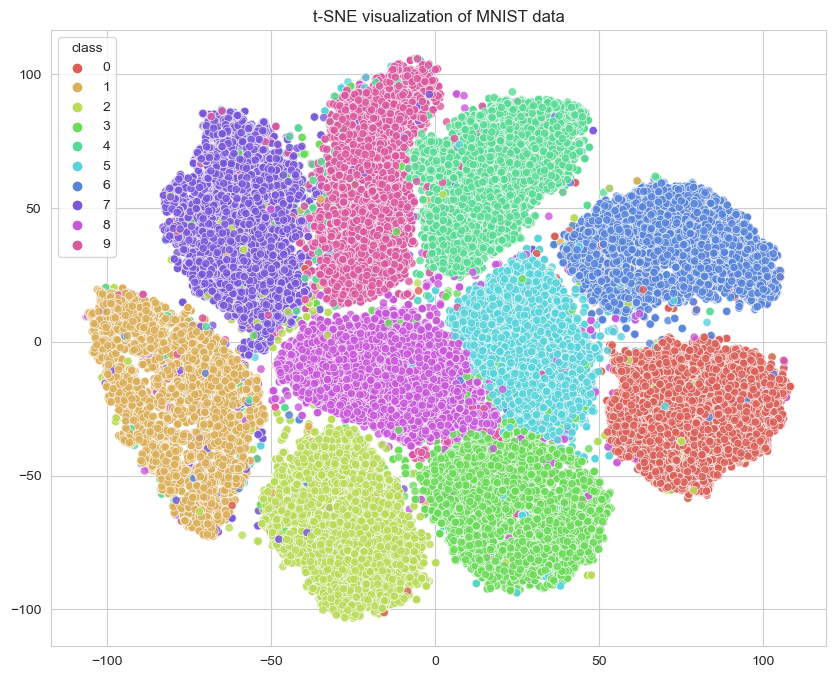

In [93]:
from sklearn.manifold import TSNE
from sklearn import manifold
from sklearn import datasets

# 加载数据
data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
pixel_values, targets = data
targets = targets.astype(int)

# 定义可视化函数
def visualize_tsne(X, y):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=sns.color_palette("hls", 10), legend="full", alpha=0.8)
    plt.title('t-SNE visualization of MNIST data')
    plt.show()

# 使用 t-SNE 进行降维
tsne = manifold.TSNE(n_components=2, random_state=42, perplexity=25)
transformed_data = tsne.fit_transform(pixel_values)

# 可视化降维后的数据
visualize_tsne(transformed_data, targets)

轮廓系数:  0.40864697


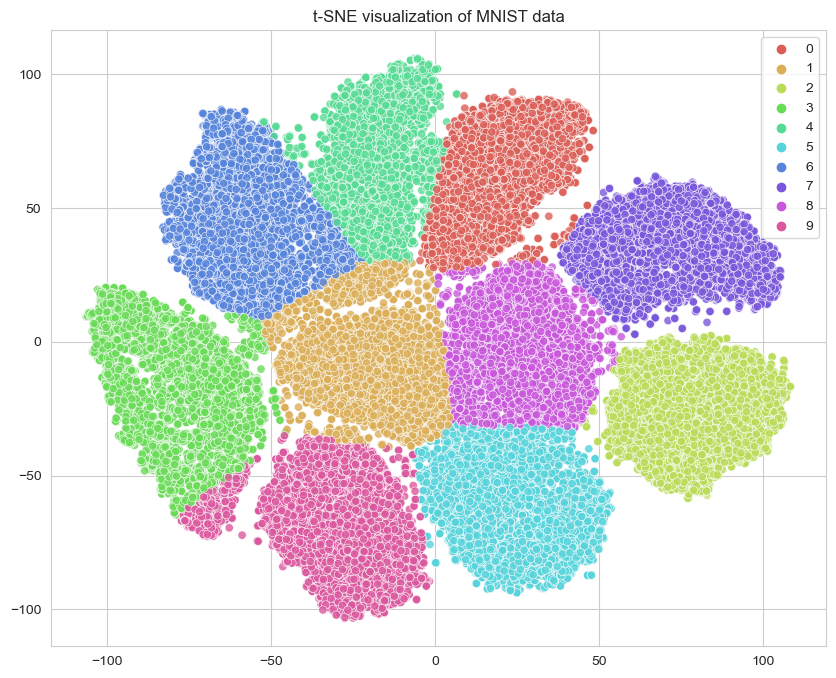

In [98]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 使用 K-Means 对降维后的数据进行聚类
kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(transformed_data)

# 计算轮廓系数
silhouette_avg = silhouette_score(transformed_data, cluster_labels)
print("轮廓系数: ", silhouette_avg)

# 可视化 K-Means 聚类结果
visualize_tsne(transformed_data, cluster_labels)

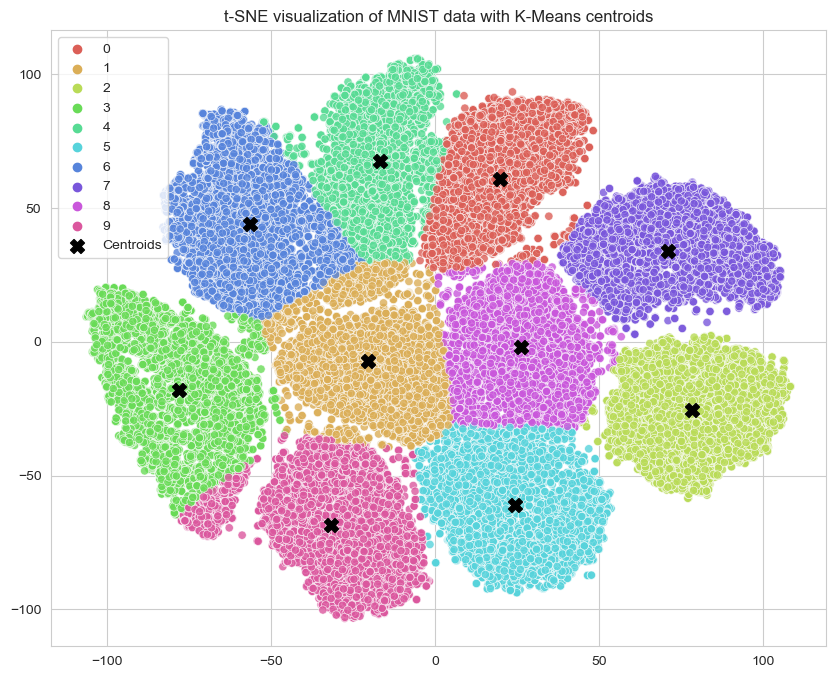

In [95]:
# 可视化聚类结果以及质心
plt.figure(figsize=(10, 8))
sns.scatterplot(x=transformed_data[:, 0], y=transformed_data[:, 1], hue=cluster_labels, 
                palette=sns.color_palette("hls", 10), legend="full", alpha=0.8)

# 计算并绘制质心
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', marker='X', label='Centroids')
plt.title('t-SNE visualization of MNIST data with K-Means centroids')
plt.legend()
plt.show()